# 統計PTT每日

In [1]:
# -*- coding: utf-8 -*-
#https://plot.ly/python/ipython-notebook-tutorial/
# pip install plotly
# conda install -c anaconda nbformat
# conda install -c conda-forge nbformat

import pymongo as mg
import datetime
import plotly
from datetime import datetime, timedelta

%config IPCompleter.greedy=True

#ECHO ptt Start ====================================
fetchdays = 1
yesterday_temp = datetime.now() - timedelta(days = fetchdays)
yesterday_date = yesterday_temp.strftime("%Y-%m-%d")
today_date = datetime.now().strftime("%Y-%m-%d")
ary1 = str(yesterday_date).split("-")
start = datetime(int(ary1[0]),int(ary1[1]),int(ary1[2]), 0, 0, 0)
ary1 = str(today_date).split("-")
end =  datetime(int(ary1[0]),int(ary1[1]),int(ary1[2]), 23, 59, 59)
#debug
start = datetime(2019, 9, 26, 0, 0, 0)
end = datetime(2019, 9, 29, 23, 59, 59)
client = mg.MongoClient('127.0.0.1:27017')
db = client["ptt"]
col = db['Gossiping']
sort = [("date", -1)]
result = col.find({"date":{'$gte': start, '$lte': end}})
#result = col.find({"date":{'$gte': start, '$lte': end}}).limit(100)
#result = col.find({"date":{'$gte': start, '$lte': end}}).sort(sort).limit(100)
# result = col.find({"date":{'$gte': start, '$lte': end}})
# result = col.find({"url":"https://www.ptt.cc/bbs/Gossiping/M.1507319547.A.8CF.html","date":{'$gte': start, '$lte': end} })
result  =  list(result)
#ECHO ptt End ====================================


#Own ptt Start ====================================
# client = mg.MongoClient('127.0.0.1:27017')
# db = client['ptt'] #DBName: ptt
# start = datetime(2017, 9, 14, 0, 0, 0)
# end = datetime(2017, 9, 19, 23, 59, 59)
# result = db['Gossiping'].find({ 'date':{'$gte':start,'$lte':end } })
# result  =  list(result)
#Own ptt End ====================================

temp_dict = {}
date_dict = {}
for x in result:
    temp_dict[ x['url'] ] = x

print ("distinct %s records found." % (len(temp_dict) ) )

post_dict = {}
post_counter = 0
last_sum = 0
for x in temp_dict:
    last_sum = 0
    post_counter = 0
    dt = temp_dict[x]["date"].strftime("%Y-%m-%d")
    try:
        last_sum = post_dict[dt]['counter']
        post_dict[dt]={'counter':last_sum+1}
    except Exception as e:
        post_counter = post_counter+1
        post_dict[dt]={'counter':post_counter}
        pass

x_axis = []
y_axis = []
for x in post_dict:
    x_axis.append(x)
    y_axis.append(post_dict[x]['counter'])

zipped = zip(x_axis, y_axis)
x_axis = []
y_axis = []
zipped = sorted(zipped, key=lambda x: x[0])
for x in zipped:
    x_axis.append(x[0])
    y_axis.append(x[1])
print(x_axis)
print(y_axis)

distinct 7057 records found.
['2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29']
[1820, 1668, 1644, 1925]


In [2]:
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
        "data": [{
                "x": x_axis,
                "y": y_axis
            }],
        "layout": {
            "title": "David PTT 八卦版每日發文數統計"
        }
    })

In [3]:
tmp_score = 0
lastSumScore = 0
for x in temp_dict:
    dt = temp_dict[x]["date"].strftime("%Y-%m-%d")
    #print(dt)
    try:
        #print(temp_dict[x]['comments'])
        score = 0
        for y in list(temp_dict[x]['comments']):
            try:
                lastSumScore = date_dict[dt]['score']
                score = lastSumScore+y['score']
                date_dict[dt]={'date':dt,'score':score}
            except Exception as e:
                score = y['score']
                date_dict[dt]={'date':dt,'score':score}
                pass
    except Exception as e:
        #print('Exception:'+str(e))
        pass
#print(date_dict)
x_axis = []
y_axis = []
for x in date_dict:
    x_axis.append(x)
    y_axis.append(date_dict[x]['score'])

zipped = zip(x_axis, y_axis)
x_axis = []
y_axis = []
zipped = sorted(zipped, key=lambda x: x[0])
for x in zipped:
    x_axis.append(x[0])
    y_axis.append(x[1])
print(x_axis)
print(y_axis)

['2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29']
[22524, 18984, 18113, 24817]


In [4]:
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
        "data": [{
                "x": x_axis,
                "y": y_axis
            }],
        "layout": {
            "title": "David PTT 八卦版每日互動(推-噓)觀察"
        }
    })


## Visualization

In [5]:
result[:1]

[{'_id': ObjectId('5d92a5b60f2f4071511d3a93'),
  'author': 'lovecorn',
  'board': 'Gossiping',
  'comments': [{'content': ': 換',
    'ip': '223.141.203.117',
    'score': 1,
    'time': '09/30 00:00',
    'user': 'leito'},
   {'content': ': 為什麼不去',
    'ip': '122.30.201.175',
    'score': 1,
    'time': '09/30 00:00',
    'user': 'cena0605'},
   {'content': ': 小颱風而已 當然換 恭喜你',
    'ip': '39.8.62.38',
    'score': 1,
    'time': '09/30 00:00',
    'user': 'lfk'},
   {'content': ': 換阿 why not',
    'ip': '220.132.191.60',
    'score': 1,
    'time': '09/30 00:00',
    'user': 'Ericz7000'},
   {'content': ': 換到他破產',
    'ip': '1.161.139.24',
    'score': 1,
    'time': '09/30 00:00',
    'user': 'snsdakb48'},
   {'content': ': 時薪1000還不錯啊',
    'ip': '59.127.1.217',
    'score': 0,
    'time': '09/30 00:00',
    'user': 's902131'},
   {'content': ': 時薪一千 要幹嘛？',
    'ip': '114.27.210.26',
    'score': 1,
    'time': '09/30 00:00',
    'user': 'r66'},
   {'content': ': 可以',
    'ip': '1.168.1

In [6]:
import pandas as pd

df = pd.DataFrame(result)
df.head(1)

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url
0,5d92a5b60f2f4071511d3a93,lovecorn,Gossiping,"[{'user': 'leito', 'content': ': 換', 'score': ...","\n明天放颱風假,\n\n但老闆有一件急事要辦,\n\n開出明天上6個小時班,\n\n換60...",2019-09-29 23:59:42,59.102.148.166,(臺灣),40,"[問卦] 沒颱風的颱風假,一天6小換6000台幣,換嗎?",2019-10-01 09:02:46.587,https://www.ptt.cc/bbs/Gossiping/M.1569772785....


In [7]:
from datetime import datetime as dt

def weekday(posts):
    weekdays = []
    for post in posts:
        weekdays.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").weekday()+1)
    return weekdays

def hour(posts):
    hours = []
    for post in posts:
        hours.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").hour)
    return hours

def day(posts):
    days = []
    for post in posts:
        days.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").strftime('%Y-%m-%d'))
    return days

In [8]:
df['hour'] = hour(df['date'].astype(str))
df['weekday'] = weekday(df['date'].astype(str))
df['post_date'] = day(df['date'].astype(str))
df.head(1)

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url,hour,weekday,post_date
0,5d92a5b60f2f4071511d3a93,lovecorn,Gossiping,"[{'user': 'leito', 'content': ': 換', 'score': ...","\n明天放颱風假,\n\n但老闆有一件急事要辦,\n\n開出明天上6個小時班,\n\n換60...",2019-09-29 23:59:42,59.102.148.166,(臺灣),40,"[問卦] 沒颱風的颱風假,一天6小換6000台幣,換嗎?",2019-10-01 09:02:46.587,https://www.ptt.cc/bbs/Gossiping/M.1569772785....,23,7,2019-09-29


## 周間、24小時鄉民 發文 的熱度

In [9]:
import matplotlib.pyplot as plt
import json
%matplotlib inline

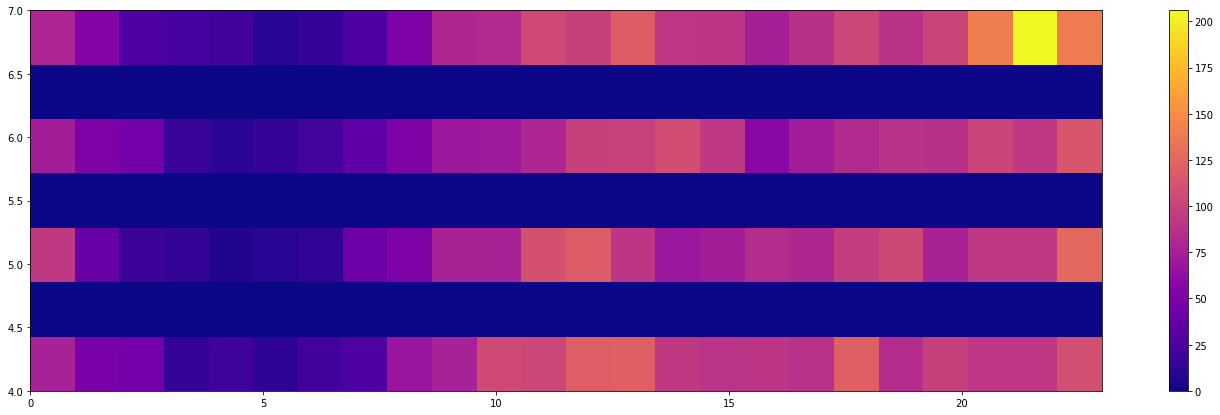

In [10]:
plt.figure(figsize=(24,7))
plt.hist2d(df['hour'], df['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

### scatter by followers count and post count

In [11]:
import json

# display all comments from ptt post
# pd.set_option('display.max_colwidth', -1)

df["reaction"] = df["comments"].apply(lambda x: len(x))
#df["comment_word_count"] = df["comments"].apply(lambda x: len(x))
df.head(1)

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url,hour,weekday,post_date,reaction
0,5d92a5b60f2f4071511d3a93,lovecorn,Gossiping,"[{'user': 'leito', 'content': ': 換', 'score': ...","\n明天放颱風假,\n\n但老闆有一件急事要辦,\n\n開出明天上6個小時班,\n\n換60...",2019-09-29 23:59:42,59.102.148.166,(臺灣),40,"[問卦] 沒颱風的颱風假,一天6小換6000台幣,換嗎?",2019-10-01 09:02:46.587,https://www.ptt.cc/bbs/Gossiping/M.1569772785....,23,7,2019-09-29,65


In [19]:
df["comment_raw"] = df["comments"].apply(lambda x: " ".join([word['content'].strip(': ') for word in x]))
df['comment_length'] = df["comment_raw"].apply(len)
df['comment_avg_length'] = (df["comment_length"]/df["reaction"])
df['comment_avg_length'].fillna(0, inplace=True)
df['comment_avg_length'] = df['comment_avg_length'].astype(int)
df.head(1)

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url,hour,weekday,post_date,reaction,comment_raw,comment_length,comment_avg_length
0,5d92a5b60f2f4071511d3a93,lovecorn,Gossiping,"[{'user': 'leito', 'content': ': 換', 'score': ...","\n明天放颱風假,\n\n但老闆有一件急事要辦,\n\n開出明天上6個小時班,\n\n換60...",2019-09-29 23:59:42,59.102.148.166,(臺灣),40,"[問卦] 沒颱風的颱風假,一天6小換6000台幣,換嗎?",2019-10-01 09:02:46.587,https://www.ptt.cc/bbs/Gossiping/M.1569772785....,23,7,2019-09-29,65,換 為什麼不去 小颱風而已 當然換 恭喜你 換阿 why not 換到他破產 時薪1000還...,674,10


In [26]:
df.loc[df['comment_avg_length'] > 20]

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url,hour,weekday,post_date,reaction,comment_raw,comment_length,comment_avg_length
930,5d92a8180f2f4071511d4959,alod1023,Gossiping,"[{'user': 'lymyuming', 'content': ': 肥菊2.0,給12...",\n,2019-09-29 16:10:58,118.168.94.93,(臺灣),1,Re: [新聞] 蔡英文參訪桃園農博展 稱讚全台首創福菜,2019-10-01 09:12:56.028,https://www.ptt.cc/bbs/Gossiping/M.1569744661....,16,7,2019-09-29,1,"肥菊2.0,給12年負債會破2000億嗎??",22,22
1828,5d92aa680f2f4071511d57a7,mother,Gossiping,"[{'user': 'AppleMan', 'content': ': /|||\ ...",\n,2019-09-29 01:14:27,219.91.2.54,(臺灣),0,Re: [問卦] 不小心有太多地怎麼辦？,2019-10-01 09:22:48.133,https://www.ptt.cc/bbs/Gossiping/M.1569690870....,1,7,2019-09-29,1,/|||\ /|||\ /|||\,27,27
1842,5d92aa6e0f2f4071511d57cf,mother,Gossiping,"[{'user': 'AppleMan', 'content': ': /|||\ /||...",\n,2019-09-29 01:03:48,219.91.2.54,(臺灣),1,Re: [問卦] 樂團唱現場忘詞怎麼辦,2019-10-01 09:22:54.940,https://www.ptt.cc/bbs/Gossiping/M.1569690233....,1,7,2019-09-29,2,/|||\ /|||\ /|||\ /|||\ /|||\ 老木還沒睡~(@,42,21
6391,5d92b62b0f2f4071511da021,widec,Gossiping,"[{'user': 'gk1329', 'content': ': co2要500以下吧 p...",\n,2019-09-26 12:26:11,111.253.56.23,(臺灣),1,Re: [問卦] 圖書館內pM2.5和CO2濃度沒有優良 求解,2019-10-01 10:12:59.467,https://www.ptt.cc/bbs/Gossiping/M.1569471973....,12,4,2019-09-26,8,co2要500以下吧 pm2.5要15以下 我記得 戶外co2一般都400左右 100年前...,168,21


In [24]:
groupbyUsermMean = df.groupby('author').mean()

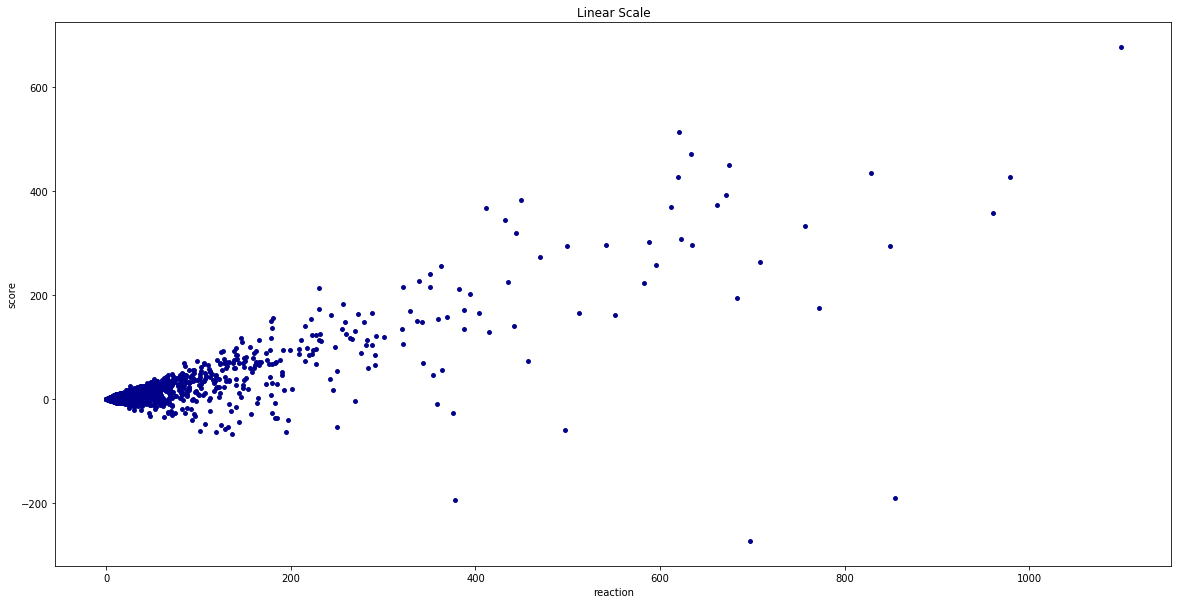

In [14]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='reaction',y='score',c='DarkBlue',ax=ax[1], s=15)
plt.show()

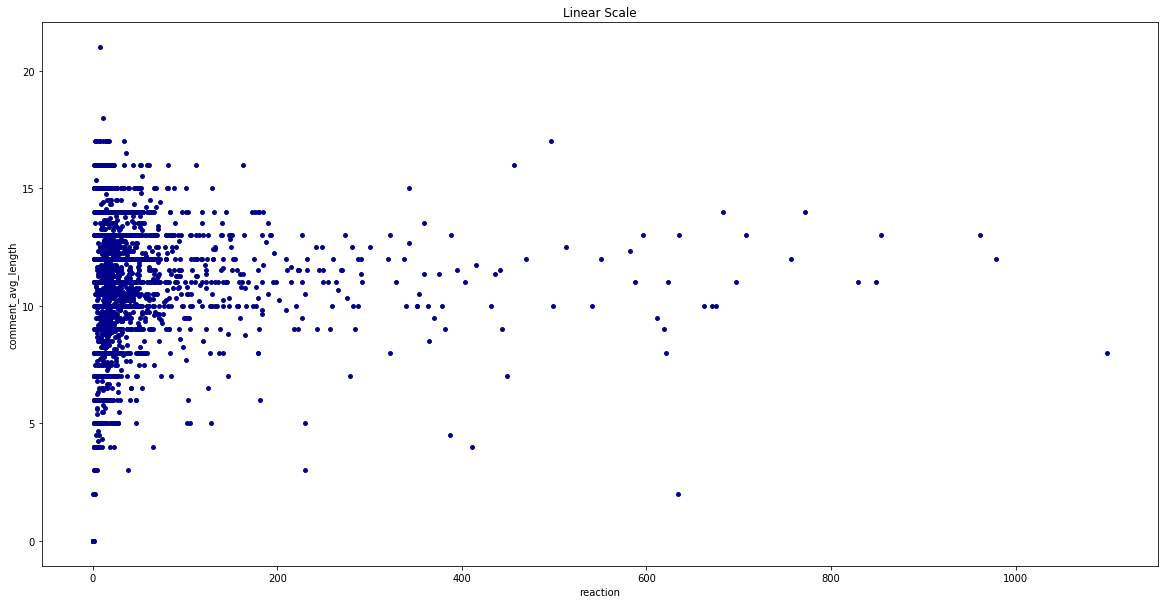

In [15]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='reaction',y='comment_avg_length',c='DarkBlue',ax=ax[1], s=15)
plt.show()

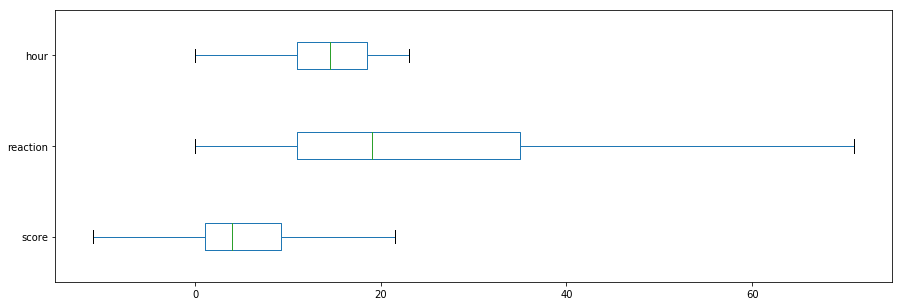

In [16]:
plot = groupbyUsermMean[['score','reaction', 'hour']].plot.box(figsize=(15,5), vert=False, showfliers=False)

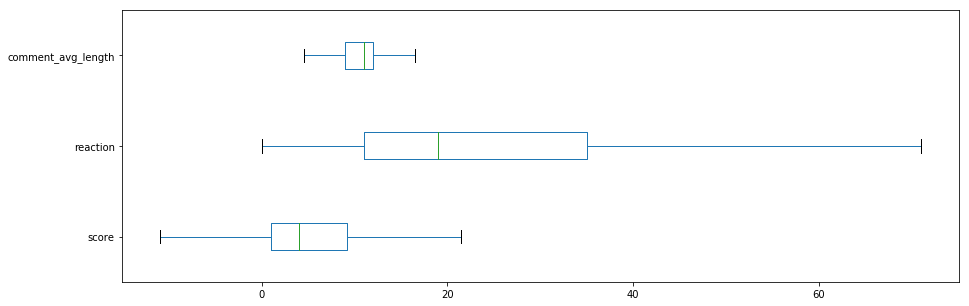

In [17]:
plot = groupbyUsermMean[['score','reaction', 'comment_avg_length']].plot.box(figsize=(15,5), vert=False, showfliers=False)

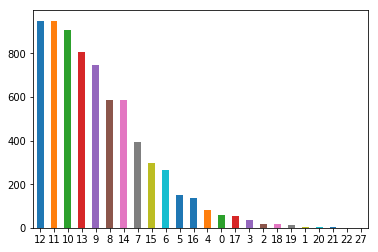

In [18]:
# 平均單則留言字數在 10 字左右
df['comment_avg_length'].value_counts().plot(kind="bar", rot=0)

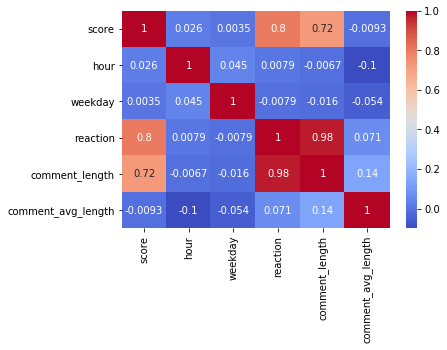

In [28]:
import seaborn as sns
%matplotlib inline

sns.heatmap(df.corr(), cmap='coolwarm', annot=True)